# SNA - Cestas de Churrasco versão 1

In [1]:
# Bibliotecas necessárias
import pandas as pd
import os
import numpy as np
import operator
import scipy.sparse as sp
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns
!pip install python-louvain
import matplotlib.cm as cm
from community import community_louvain

  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9414 sha256=f6f020f7418621c2e2ba59a438ca8335bb4b5c0b001b8d7171ecef74b7fd4a8e
  Stored in directory: c:\users\99836932\appdata\local\pip\cache\wheels\4d\7c\b6\79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain


In [2]:
# Carregar base
data = pd.read_excel(r'C:\Users\99836932\OneDrive - Anheuser-Busch InBev\My Documents\Cesta_Churrasco\base_internet_cestas_churrasco.xlsx', sheet_name='base_41_cestas')
data.head(5)

itens  cesta_01  cesta_02  cesta_03  cesta_04  cesta_05  cesta_06  \
0    abacate         0         0         0         0         0         0   
1    abacaxi         0         1         0         0         0         0   
2    abóbora         0         0         0         0         0         0   
3  abobrinha         0         0         0         0         1         0   
4     acelga         0         0         0         0         0         0   

   cesta_07  cesta_08  cesta_09  ...  cesta_32  cesta_33  cesta_34  cesta_35  \
0         0         0         0  ...         0         0         0         0   
1         1         1         1  ...         0         0         0         0   
2         0         0         0  ...         0         0         0         0   
3         1         0         0  ...         0         0         0         0   
4         0         0         0  ...         0         0         1         1   

   cesta_36  cesta_37  cesta_38  cesta_39  cesta_40  cesta_41  
0         0         0         0         0         0         0  
1         0         0         0         0         0         0  
2         0         0         0         0         0         0  
3         1         1         1         1         1         1  
4         1         1         1         1         1         1  

[5 rows x 42 columns]

In [3]:
# Transposta
df = data.T
new_header = df.iloc[0] # grab the first row for the header
df = df[1:]             # take the data less the header row
df.columns = new_header # set the header row as the df header

df.reset_index(inplace=True)                    # index to column
df = df.rename_axis(index=None, columns=None)  # delete index name
df = df.rename(columns={"index": "itens"})     # rename column
df

itens abacate abacaxi abóbora abobrinha acelga acendedor  \
0   cesta_01       0       0       0         0      0         0   
1   cesta_02       0       1       0         0      0         0   
2   cesta_03       0       0       0         0      0         0   
3   cesta_04       0       0       0         0      0         0   
4   cesta_05       0       0       0         1      0         0   
5   cesta_06       0       0       0         0      0         0   
6   cesta_07       0       1       0         1      0         0   
7   cesta_08       0       1       0         0      0         0   
8   cesta_09       0       1       0         0      0         0   
9   cesta_10       0       1       0         0      0         0   
10  cesta_11       0       0       0         0      0         0   
11  cesta_12       0       1       0         0      1         0   
12  cesta_13       0       1       0         0      0         0   
13  cesta_14       0       1       0         0      0         0   
14  cesta_15       1       1       0         1      0         0   
15  cesta_16       1       1       0         1      0         0   
16  cesta_17       0       1       0         0      0         0   
17  cesta_18       0       0       0         0      0         0   
18  cesta_19       0       0       0         0      0         0   
19  cesta_20       0       0       1         0      0         0   
20  cesta_21       0       0       0         0      0         0   
21  cesta_22       0       0       0         0      0         0   
22  cesta_23       0       0       0         0      0         0   
23  cesta_24       0       0       0         0      0         0   
24  cesta_25       0       1       0         0      1         0   
25  cesta_26       0       0       0         0      0         0   
26  cesta_27       0       0       0         0      0         0   
27  cesta_28       0       0       0         0      0         0   
28  cesta_29       0       0       0         0      0         0   
29  cesta_30       0       0       0         0      0         0   
30  cesta_31       0       0       0         0      0         0   
31  cesta_32       0       0       0         0      0         0   
32  cesta_33       0       0       0         0      0         0   
33  cesta_34       0       0       0         0      1         1   
34  cesta_35       0       0       0         0      1         1   
35  cesta_36       0       0       0         1      1         1   
36  cesta_37       0       0       0         1      1         1   
37  cesta_38       0       0       0         1      1         1   
38  cesta_39       0       0       0         1      1         1   
39  cesta_40       0       0       0         1      1         1   
40  cesta_41       0       0       0         1      1         1   

   acho argentino açucar adoçante  ... uísque vagem vasilha vegetais vinagre  \
0               0      0        0  ...      0     1       0        0       0   
1               0      1        0  ...      0     0       0        0       0   
2               0      0        0  ...      0     0       0        0       0   
3               0      0        0  ...      0     0       0        0       0   
4               0      0        0  ...      0     0       0        0       0   
5               0      1        0  ...      0     1       0        0       1   
6               0      0        0  ...      0     0       0        0       0   
7               0      0        0  ...      0     0       0        0       0   
8               0      0        0  ...      0     0       0        0       0   
9               0      0        0  ...      0     0       0        0       0   
10              0      0        0  ...      0     0       0        0       0   
11              0      0        0  ...      0     0       0        0       0   
12              0      0        0  ...      0     0       0        0       0   
13              0      0        0  ...      0     0       0        0    

In [11]:
# df to social network analysis
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html
ds = pd.melt(df, id_vars=['itens'])
ds.columns = ['source', 'target', 'weight']
#ds = ds[ds['weight'].notna()]
ds = ds[ds.weight != 0]
ds

source         target weight
14     cesta_15        abacate      1
15     cesta_16        abacate      1
42     cesta_02        abacaxi      1
47     cesta_07        abacaxi      1
48     cesta_08        abacaxi      1
...         ...            ...    ...
12024  cesta_12          vinho      1
12037  cesta_25          vinho      1
12070  cesta_17  vodka absolut      1
12124  cesta_30         whisky      1
12160  cesta_25         xícara      1

[1764 rows x 3 columns]

In [12]:
# Imprime a lista de gráficos disponíveis em NetworkX
print([s for s in dir(nx) if s.endswith('graph')])

['LCF_graph', 'LFR_benchmark_graph', 'adjacency_graph', 'barabasi_albert_graph', 'barbell_graph', 'binomial_graph', 'bull_graph', 'caveman_graph', 'chordal_cycle_graph', 'chvatal_graph', 'circulant_graph', 'circular_ladder_graph', 'complete_bipartite_graph', 'complete_graph', 'complete_multipartite_graph', 'complete_to_chordal_graph', 'connected_caveman_graph', 'connected_watts_strogatz_graph', 'cubical_graph', 'cycle_graph', 'cytoscape_graph', 'davis_southern_women_graph', 'dense_gnm_random_graph', 'desargues_graph', 'diamond_graph', 'digraph', 'directed_havel_hakimi_graph', 'directed_joint_degree_graph', 'dodecahedral_graph', 'dorogovtsev_goltsev_mendes_graph', 'dual_barabasi_albert_graph', 'duplication_divergence_graph', 'edge_subgraph', 'ego_graph', 'empty_graph', 'erdos_renyi_graph', 'expected_degree_graph', 'extended_barabasi_albert_graph', 'fast_gnp_random_graph', 'florentine_families_graph', 'frucht_graph', 'gaussian_random_partition_graph', 'general_random_intersection_graph',

In [13]:
# Cria base no formato rede 
g = nx.from_pandas_edgelist(ds, 'source', 'target', ['weight'])

In [14]:
# Informações da rede
print(nx.info(g))

Graph with 338 nodes and 1764 edges


C:\Users\99836932\AppData\Local\Temp\ipykernel_12112\3625457866.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(g))


In [16]:
# Medidas de centralidade e dispersão
my_degrees = g.degree()
degree_values = dict(my_degrees).values()

# Medidas de centralidade e dispersão (média e desvio)
mu = np.mean(list(degree_values))  # mean of distribution
std = np.std(list(degree_values))  # standard deviation of distribution
print("\n",'Média :', round(mu, 3),"\n",'D.Padrão:', round(std, 3))


 Média : 10.438 
 D.Padrão: 15.235


In [17]:
# Degree: total de arestas conectadas a um determinado vértice (as vezes denominado degree centrality)
# https://www.sciencedirect.com/topics/computer-science/degree-centrality
g.degree()

DegreeView({'cesta_15': 61, 'abacate': 2, 'cesta_16': 58, 'cesta_02': 31, 'abacaxi': 12, 'cesta_07': 30, 'cesta_08': 55, 'cesta_09': 54, 'cesta_10': 53, 'cesta_12': 29, 'cesta_13': 24, 'cesta_14': 36, 'cesta_17': 69, 'cesta_25': 66, 'cesta_20': 36, 'abóbora': 1, 'cesta_05': 38, 'abobrinha': 10, 'cesta_36': 63, 'cesta_37': 64, 'cesta_38': 68, 'cesta_39': 70, 'cesta_40': 77, 'cesta_41': 78, 'acelga': 10, 'cesta_34': 54, 'cesta_35': 55, 'acendedor': 8, 'acho argentino': 2, 'açucar': 11, 'cesta_06': 31, 'adoçante': 8, 'cesta_04': 26, 'agrião': 15, 'cesta_31': 27, 'cesta_32': 19, 'cesta_01': 58, 'água': 32, 'cesta_03': 29, 'cesta_11': 22, 'cesta_18': 54, 'cesta_19': 22, 'cesta_21': 23, 'cesta_22': 27, 'cesta_23': 27, 'cesta_26': 44, 'cesta_27': 45, 'cesta_28': 42, 'cesta_29': 25, 'cesta_30': 44, 'cesta_33': 14, 'aipim': 1, 'ajudante': 9, 'alcatra': 14, 'cesta_24': 16, 'alecrim': 1, 'alface': 20, 'alho': 10, 'amendoim': 5, 'ancho': 7, 'aperitivo': 1, 'aperol': 1, 'arroz': 38, 'atendente': 8,

In [18]:
# Degree centrality:
nx.degree_centrality(g)

{'cesta_15': 0.18100890207715134,
 'abacate': 0.005934718100890208,
 'cesta_16': 0.17210682492581603,
 'cesta_02': 0.09198813056379822,
 'abacaxi': 0.03560830860534125,
 'cesta_07': 0.08902077151335312,
 'cesta_08': 0.1632047477744807,
 'cesta_09': 0.16023738872403562,
 'cesta_10': 0.15727002967359052,
 'cesta_12': 0.08605341246290801,
 'cesta_13': 0.0712166172106825,
 'cesta_14': 0.10682492581602374,
 'cesta_17': 0.20474777448071219,
 'cesta_25': 0.19584569732937687,
 'cesta_20': 0.10682492581602374,
 'abóbora': 0.002967359050445104,
 'cesta_05': 0.11275964391691395,
 'abobrinha': 0.02967359050445104,
 'cesta_36': 0.18694362017804156,
 'cesta_37': 0.18991097922848665,
 'cesta_38': 0.20178041543026706,
 'cesta_39': 0.20771513353115728,
 'cesta_40': 0.228486646884273,
 'cesta_41': 0.2314540059347181,
 'acelga': 0.02967359050445104,
 'cesta_34': 0.16023738872403562,
 'cesta_35': 0.1632047477744807,
 'acendedor': 0.02373887240356083,
 'acho argentino': 0.005934718100890208,
 'açucar': 0.0

In [19]:
# Lista das arestas
edges = nx.dfs_edges(g)
print(edges)
print(list(edges))

<generator object dfs_edges at 0x000001FB8DDA45F0>
[('cesta_15', 'abacate'), ('abacate', 'cesta_16'), ('cesta_16', 'abacaxi'), ('abacaxi', 'cesta_02'), ('cesta_02', 'açucar'), ('açucar', 'cesta_06'), ('cesta_06', 'alho'), ('alho', 'cesta_03'), ('cesta_03', 'água'), ('água', 'cesta_01'), ('cesta_01', 'alcatra'), ('alcatra', 'cesta_04'), ('cesta_04', 'agrião'), ('agrião', 'cesta_07'), ('cesta_07', 'abobrinha'), ('abobrinha', 'cesta_05'), ('cesta_05', 'alecrim'), ('cesta_05', 'azeite'), ('azeite', 'cesta_08'), ('cesta_08', 'alface'), ('alface', 'cesta_09'), ('cesta_09', 'arroz'), ('arroz', 'cesta_10'), ('cesta_10', 'azeitona'), ('azeitona', 'cesta_12'), ('cesta_12', 'acelga'), ('acelga', 'cesta_25'), ('cesta_25', 'bacon'), ('bacon', 'cesta_14'), ('cesta_14', 'batata'), ('batata', 'cesta_13'), ('cesta_13', 'banana'), ('banana', 'cesta_17'), ('cesta_17', 'aipim'), ('cesta_17', 'ajudante'), ('ajudante', 'cesta_34'), ('cesta_34', 'acendedor'), ('acendedor', 'cesta_35'), ('cesta_35', 'adoçante

In [20]:
# Lista de nós
print(list(nx.dfs_tree(g)))

['cesta_15', 'abacate', 'cesta_16', 'cesta_02', 'abacaxi', 'cesta_07', 'cesta_08', 'cesta_09', 'cesta_10', 'cesta_12', 'cesta_13', 'cesta_14', 'cesta_17', 'cesta_25', 'cesta_20', 'abóbora', 'cesta_05', 'abobrinha', 'cesta_36', 'cesta_37', 'cesta_38', 'cesta_39', 'cesta_40', 'cesta_41', 'acelga', 'cesta_34', 'cesta_35', 'acendedor', 'acho argentino', 'açucar', 'cesta_06', 'adoçante', 'cesta_04', 'agrião', 'cesta_31', 'cesta_32', 'cesta_01', 'água', 'cesta_03', 'cesta_11', 'cesta_18', 'cesta_19', 'cesta_21', 'cesta_22', 'cesta_23', 'cesta_26', 'cesta_27', 'cesta_28', 'cesta_29', 'cesta_30', 'cesta_33', 'aipim', 'ajudante', 'alcatra', 'cesta_24', 'alecrim', 'alface', 'alho', 'amendoim', 'ancho', 'aperitivo', 'aperol', 'arroz', 'atendente', 'azeite', 'azeitona', 'baby beef', 'baby beef\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0', 'bacon', 'banana', 'batata', 'berinj

In [21]:
# Breadth-First Traversal (BFS)
# Este algoritmo atravessa a rede encontrando o caminho mais curto de um vértice (s) de fonte única para todos os outros vértices no mesmo segmento de rede.
tie = 'cerveja brahma' # aceita string ou number
edges = nx.bfs_edges(g,tie)
print(list(edges))

[('cerveja brahma', 'cesta_17'), ('cerveja brahma', 'cesta_18'), ('cesta_17', 'abacaxi'), ('cesta_17', 'açucar'), ('cesta_17', 'água'), ('cesta_17', 'aipim'), ('cesta_17', 'ajudante'), ('cesta_17', 'alcatra'), ('cesta_17', 'alface'), ('cesta_17', 'ancho'), ('cesta_17', 'arroz'), ('cesta_17', 'azeitona'), ('cesta_17', 'baby beef'), ('cesta_17', 'bacon'), ('cesta_17', 'banana'), ('cesta_17', 'batata'), ('cesta_17', 'budweiser'), ('cesta_17', 'caipirinha'), ('cesta_17', 'caipivodka'), ('cesta_17', 'calabresa'), ('cesta_17', 'canela'), ('cesta_17', 'cebola'), ('cesta_17', 'cenoura'), ('cesta_17', 'cerveja'), ('cesta_17', 'cerveja amstel'), ('cesta_17', 'cerveja antarctica'), ('cesta_17', 'cerveja stella artois'), ('cesta_17', 'chá mate'), ('cesta_17', 'churrasqueiro'), ('cesta_17', 'coca-cola normal'), ('cesta_17', 'coca-cola zero'), ('cesta_17', 'contrafilé'), ('cesta_17', 'coquetel'), ('cesta_17', 'coração de frango'), ('cesta_17', 'costelinha suína'), ('cesta_17', 'couve'), ('cesta_17',

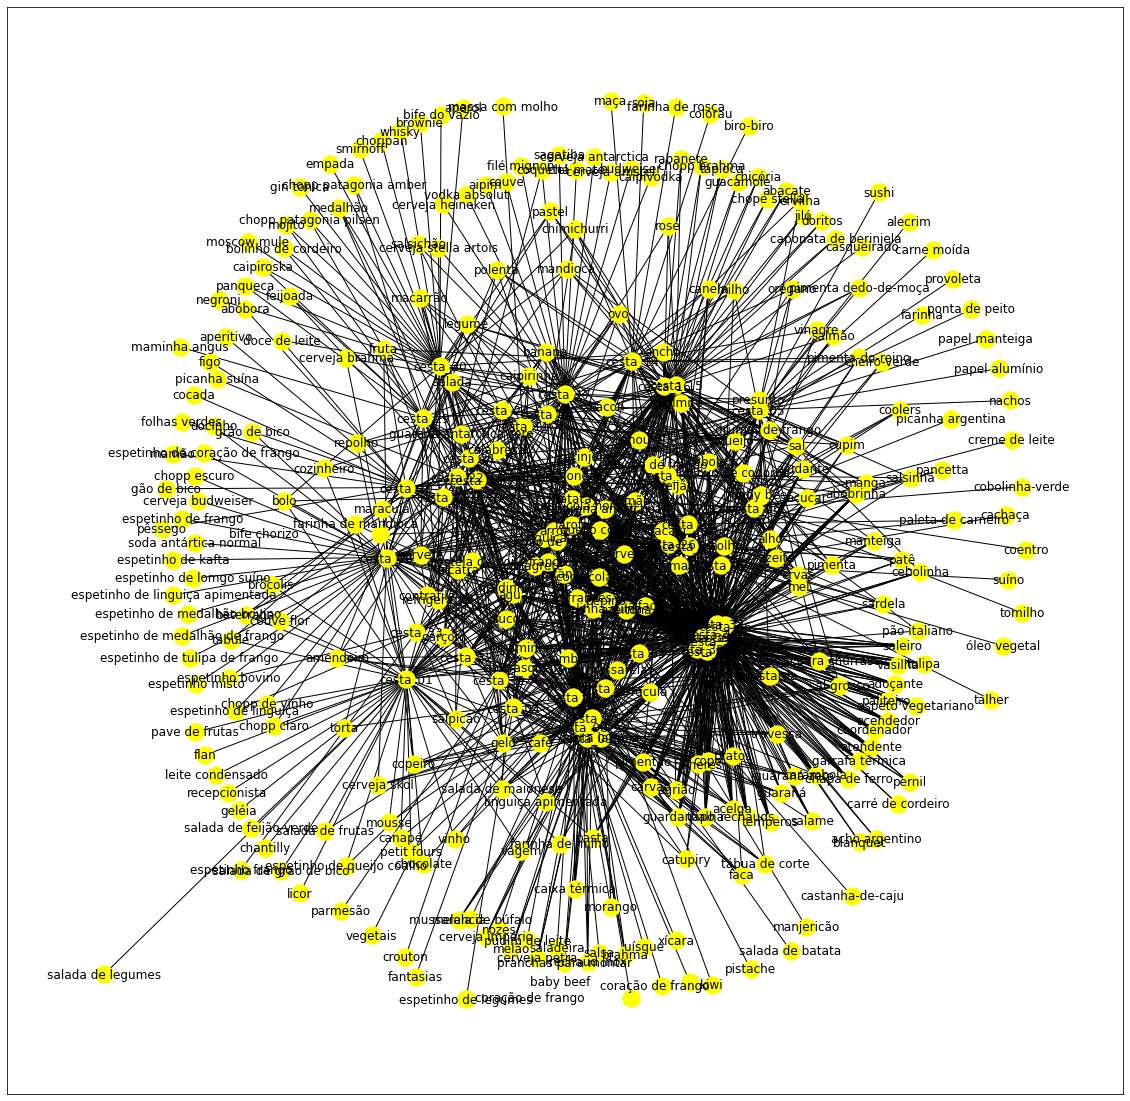

In [15]:
# Visualização da rede
plt.figure(figsize=(20,20))
nx.draw_networkx(g, node_color = 'yellow', node_size = 300, pos = nx.kamada_kawai_layout(g))

In [22]:
# Let’s define the BFS tree:
tree = nx.bfs_tree(g, tie)
print(list(tree.edges()))

[('cerveja brahma', 'cesta_17'), ('cerveja brahma', 'cesta_18'), ('cesta_17', 'abacaxi'), ('cesta_17', 'açucar'), ('cesta_17', 'água'), ('cesta_17', 'aipim'), ('cesta_17', 'ajudante'), ('cesta_17', 'alcatra'), ('cesta_17', 'alface'), ('cesta_17', 'ancho'), ('cesta_17', 'arroz'), ('cesta_17', 'azeitona'), ('cesta_17', 'baby beef'), ('cesta_17', 'bacon'), ('cesta_17', 'banana'), ('cesta_17', 'batata'), ('cesta_17', 'budweiser'), ('cesta_17', 'caipirinha'), ('cesta_17', 'caipivodka'), ('cesta_17', 'calabresa'), ('cesta_17', 'canela'), ('cesta_17', 'cebola'), ('cesta_17', 'cenoura'), ('cesta_17', 'cerveja'), ('cesta_17', 'cerveja amstel'), ('cesta_17', 'cerveja antarctica'), ('cesta_17', 'cerveja stella artois'), ('cesta_17', 'chá mate'), ('cesta_17', 'churrasqueiro'), ('cesta_17', 'coca-cola normal'), ('cesta_17', 'coca-cola zero'), ('cesta_17', 'contrafilé'), ('cesta_17', 'coquetel'), ('cesta_17', 'coração de frango'), ('cesta_17', 'costelinha suína'), ('cesta_17', 'couve'), ('cesta_17',

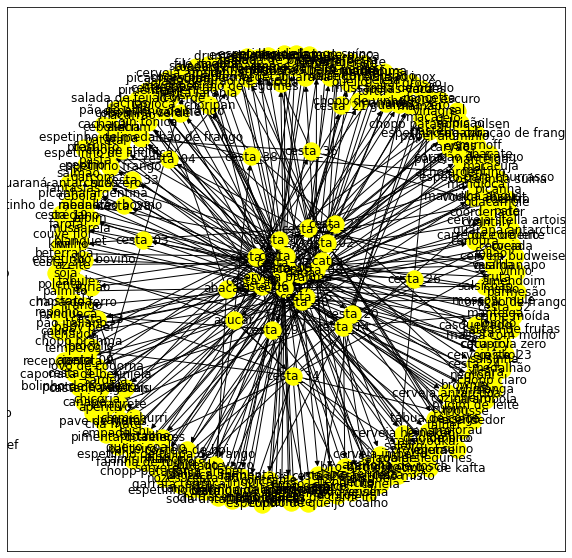

In [23]:
# Como podemos ver, a árvore de pesquisa no BFS é diferente do que era quando executamos o algoritmo de pesquisa DFS.
plt.figure(figsize=(10,10))
nx.draw_networkx(tree, node_color = 'yellow', node_size = 300)

{'whiskers': [<matplotlib.lines.Line2D at 0x1fb91f941f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fb91f94880>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fb91f83ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fb91f94d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fb91fac070>],
 'means': []}

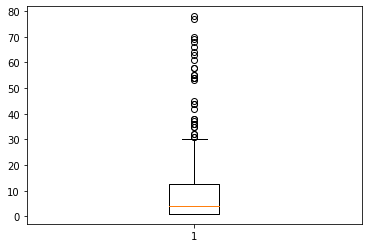

In [24]:
# Pega todos os degree dos nós e desenha um boxplot da rede
#plt.figure(figsize=(15,10))

my_degrees = g.degree()
degree_values = dict(my_degrees).values()

plt.boxplot(degree_values)

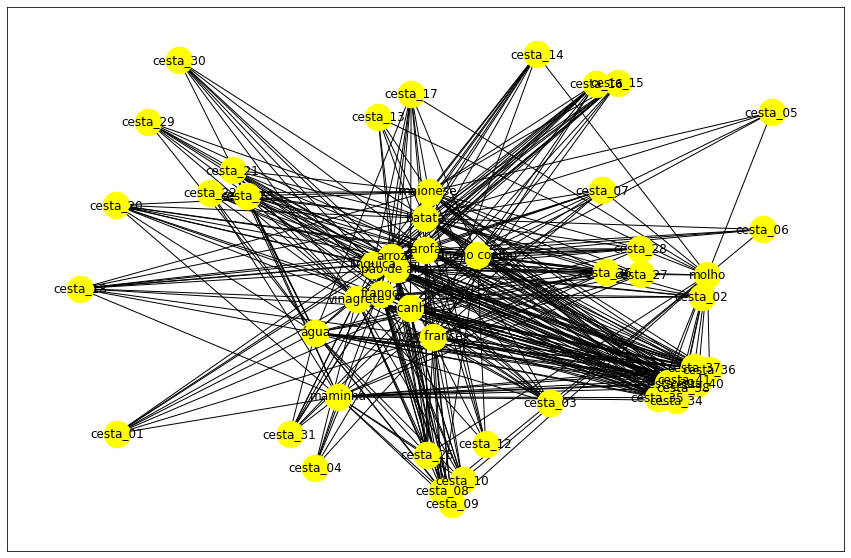

In [25]:
# Rede com nós com maior grau de centralidade
#import operator
#import networkx as nx
#import matplotlib.pyplot as plt
#%matplotlib inline

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(),key=operator.itemgetter(1))

#centrality : which nodes have the highest /lowest degree centrality
degree_cent = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_cent)

#closenness centrality : which nodes have the highest and lowest closeness centrality
closeness_cent = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness_cent)

highest_degree = [node[0] for node in degree_sorted[-50:]]

#create a subgraph
sub = g.subgraph(highest_degree)
plt.figure(figsize=(15,10))
nx.draw_networkx(sub,node_size = 700, node_color = 'yellow', pos = nx.kamada_kawai_layout(g), with_labels=True)

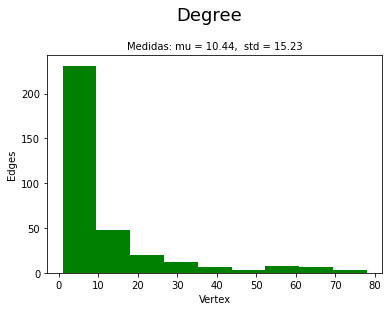

In [26]:
# Histograma
# Valores da rede
my_degrees = g.degree()
degree_values = dict(my_degrees).values()

# Medidas de centralidade e dispersão (média e desvio)
mu = np.mean(list(degree_values))  # mean of distribution
std = np.std(list(degree_values))  # standard deviation of distribution

# Regra de sturges para determinar nº de classes do histograma (bin)
sturges = int(np.trunc(1+3.3*np.log10(len(degree_values))))


x_label ='Vertex'
y_label ='Edges'
stitle = "Medidas: mu = %.2f,  std = %.2f" % (mu, std)
plt.suptitle('Degree', fontsize = 18, y = 1.05)
plt.title(stitle, fontsize = 10)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.hist(degree_values, bins = sturges, color='g')
plt.show()

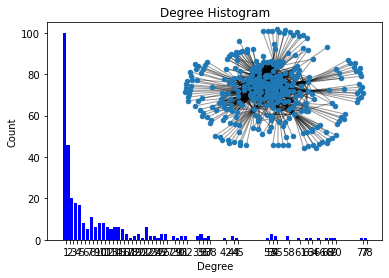

In [27]:
import collections
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="b")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(g)
plt.axis("off")
nx.draw_networkx_nodes(g, pos, node_size=20)
nx.draw_networkx_edges(g, pos, alpha=0.4)
plt.show()

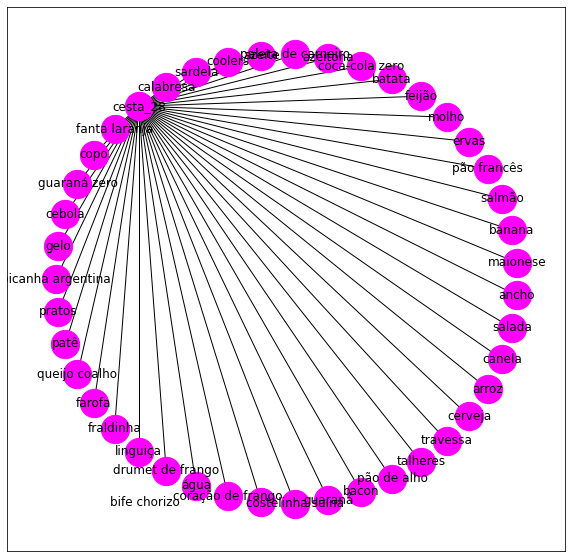

In [30]:
# Rede com base no ego selecionado
ego_net = nx.ego_graph(g, 'cesta_28')
pos=nx.shell_layout(ego_net)
plt.figure(figsize=(10,10))
nx.draw_networkx(ego_net, pos, node_size=800, node_color='magenta')

C:\Users\99836932\AppData\Local\Temp\ipykernel_12112\4178296106.py:6: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(ego_net))


Graph with 43 nodes and 42 edges


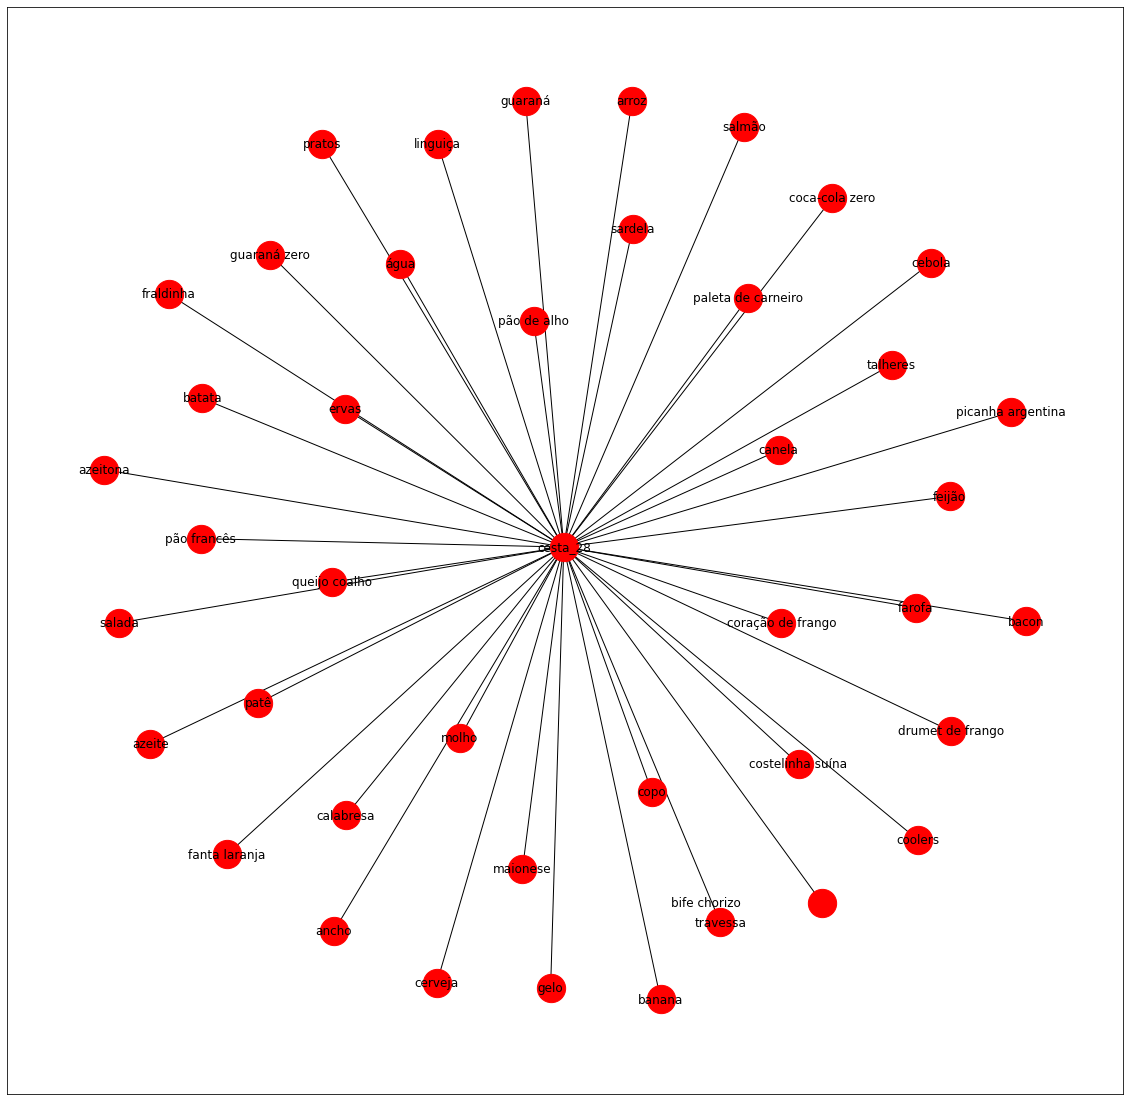

In [32]:
# Determina a rede com base no ego selecionado
nx.ego_graph(g,"cesta_28", 1)
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(ego_net)
nx.draw_networkx(ego_net, pos, with_labels=True, node_size=800, alpha=1, node_color='r')
print(nx.info(ego_net))

In [33]:
# Função para identificação de indivíduos influentes na rede
def hierarchy_pos(g, root, width= 1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5 ):
    def h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5,
                pos = None, parent = None, parsed = [] ):
        if(root not in parsed):
            parsed.append(root)
            if pos == None:
                pos = {root:(xcenter,vert_loc)}
            else:
                pos[root] = (xcenter, vert_loc)
                neighbors = G.neighbors(root)
                if parent != None:
                    neighbors.remove(parent)
                if len(neighbors)!=0:
                    dx = width/len(neighbors)
                    nextx = xcenter - width/2 - dx/2
                    for neighbor in neighbors:
                        nextx += dx
                        pos = h_recur(G,neighbor, width = dx, vert_gap = 
                                      vert_gap, vert_loc = vert_loc-vert_gap, xcenter=nextx, pos=pos,
                                      parent = root, parsed = parsed)
                return pos
            return h_recur(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5)

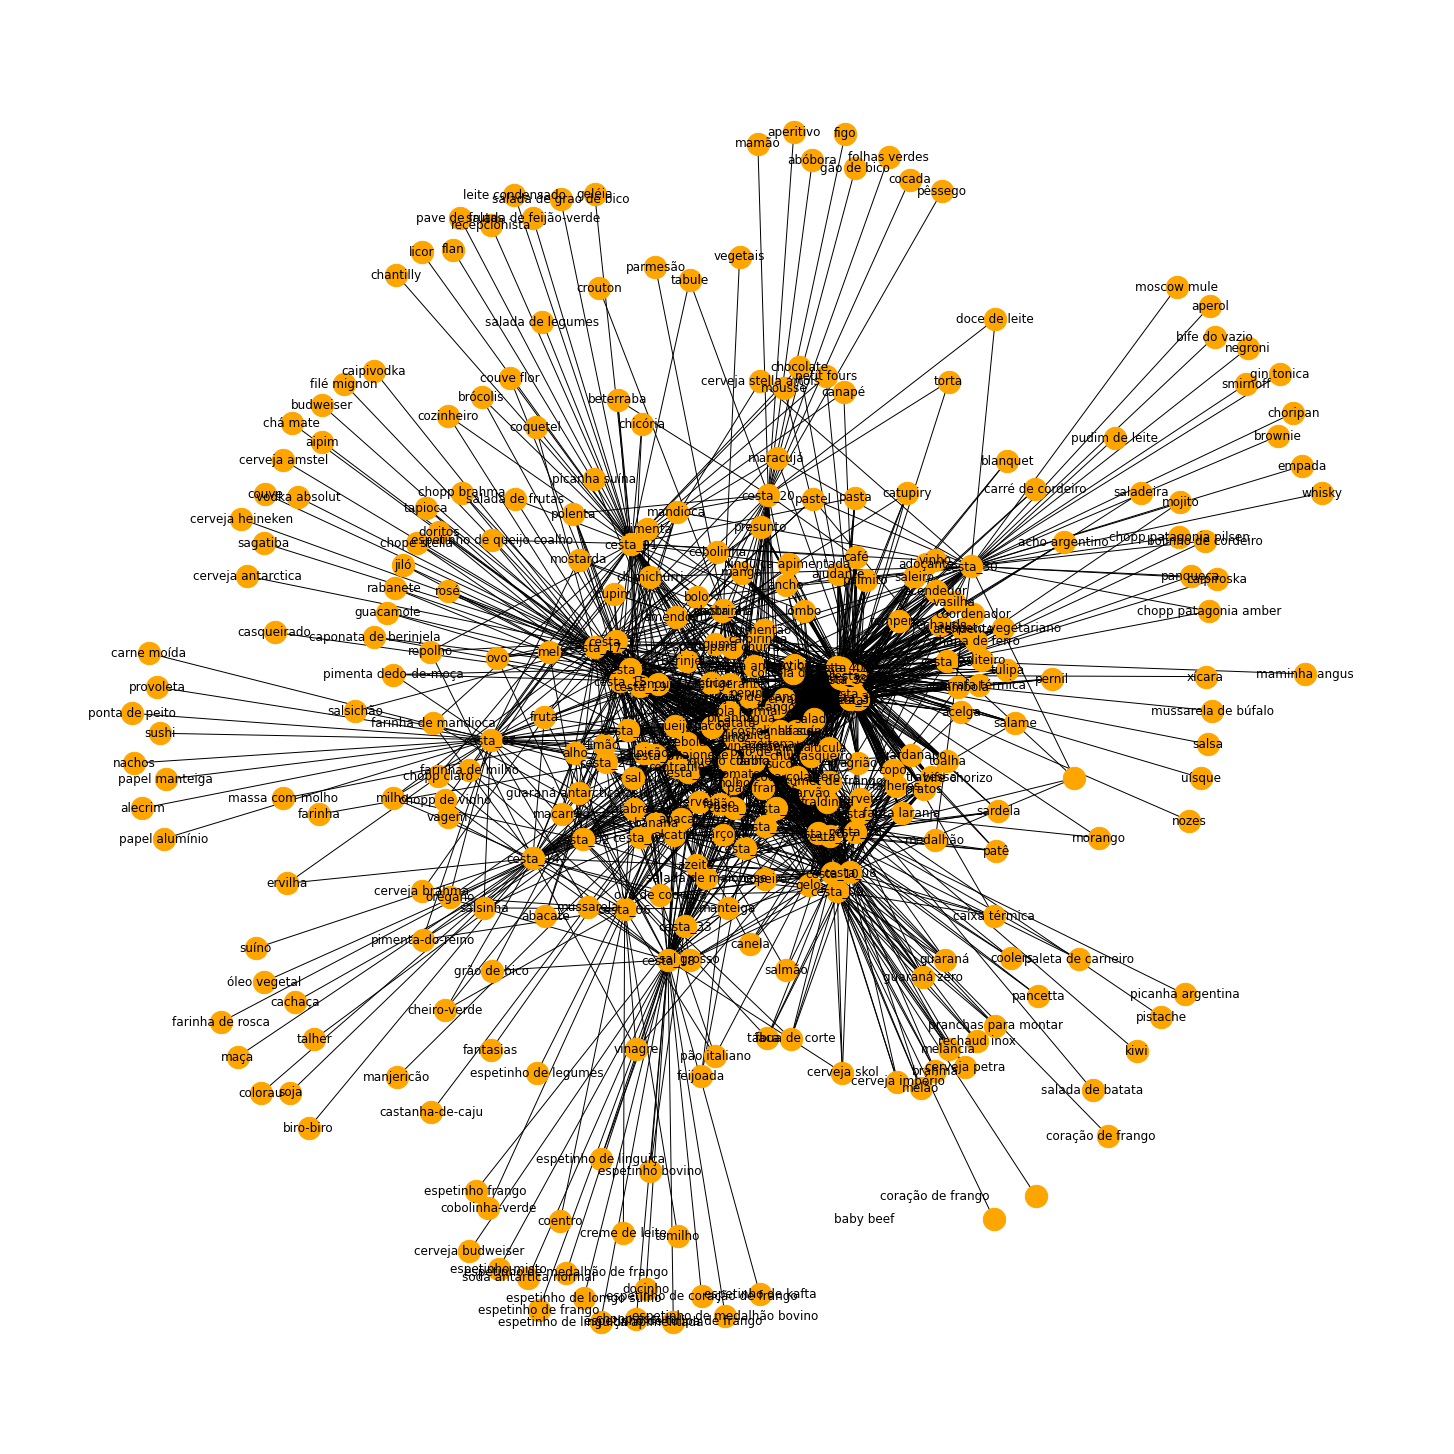

In [34]:
# Posição hierárquica na rede
pos = hierarchy_pos(g,1)
plt.figure(figsize=(20, 20))
nx.draw(g, pos=pos, with_labels=True, node_size= 500,
node_color='orange')

## Community detection

In [35]:
# Pacotes necessários
#!pip install python-louvain
#import matplotlib.cm as cm
#from community import community_louvain

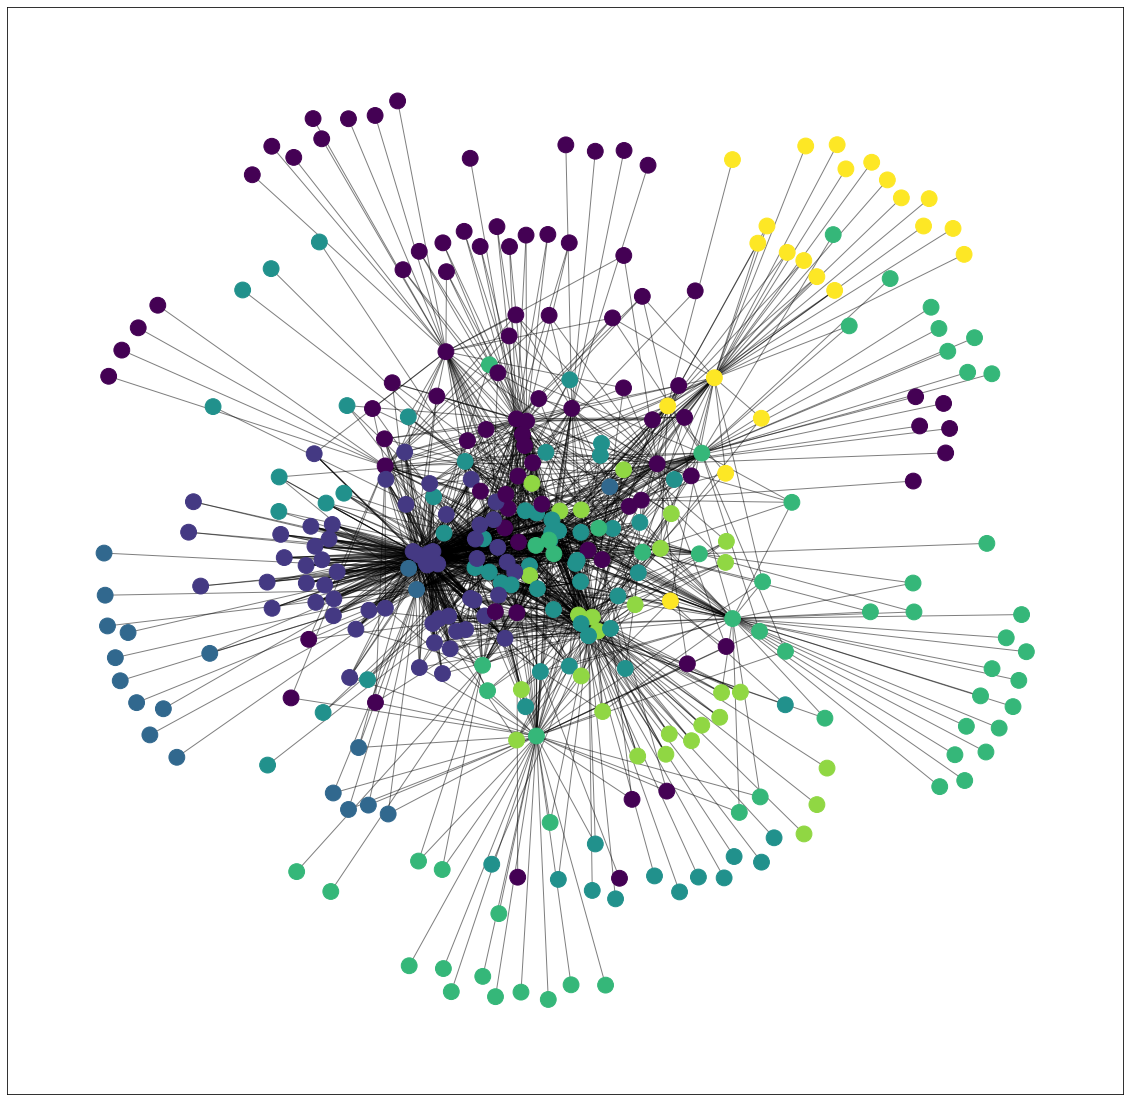

In [36]:
# Communities
partition = community_louvain.best_partition(g)
pos = nx.spring_layout(g)
#pos = nx.kamada_kawai_layout(g)
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
plt.figure(figsize=(20, 20))
nx.draw_networkx_nodes(g, pos, partition.keys(), node_size=250, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(g, pos, alpha=0.5)
plt.show()

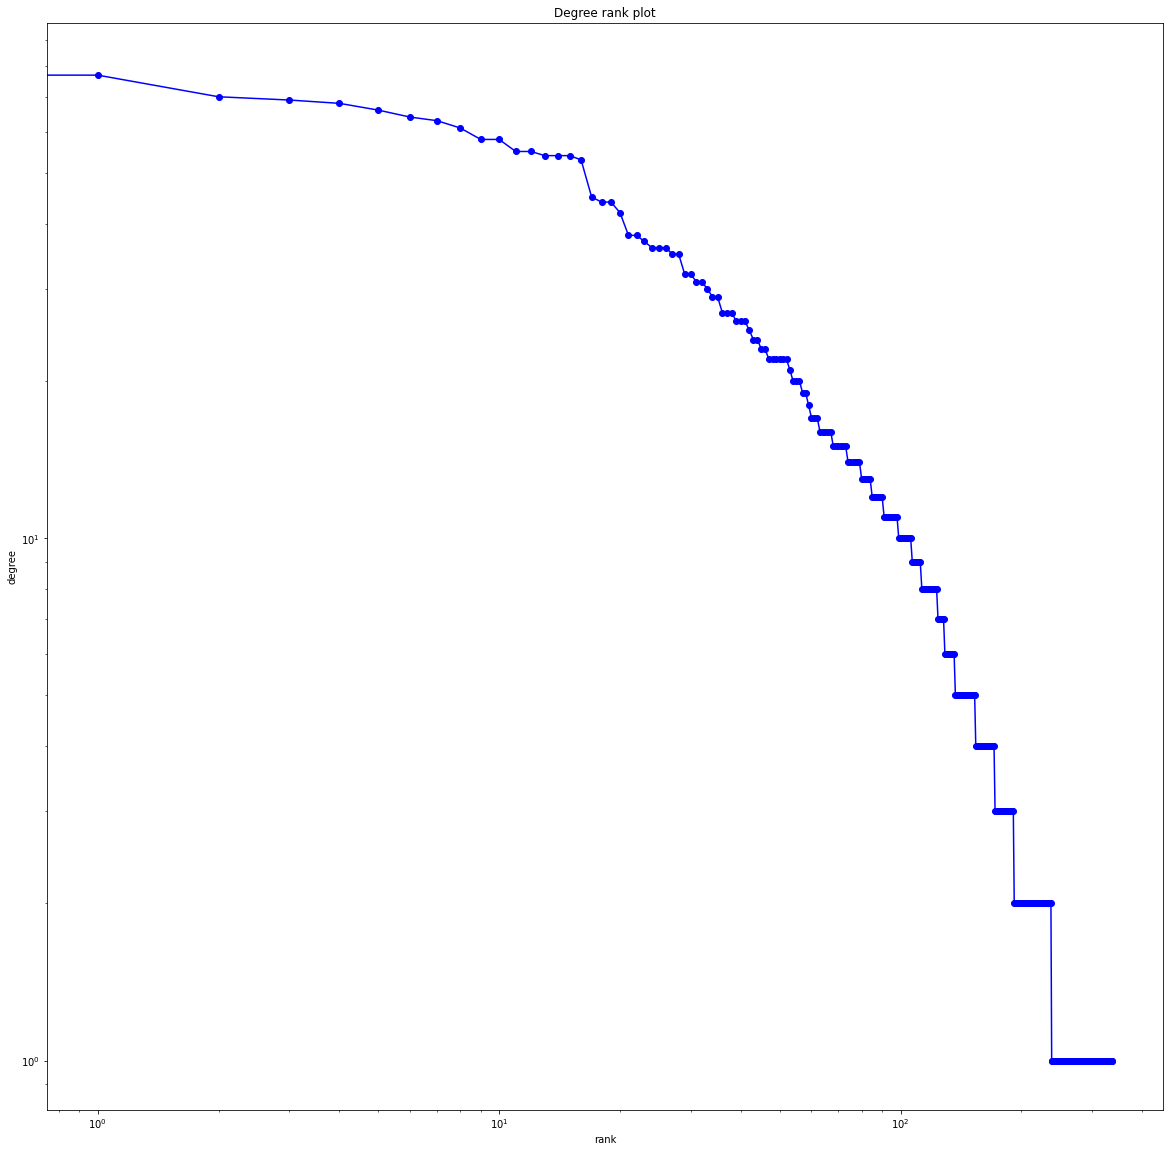

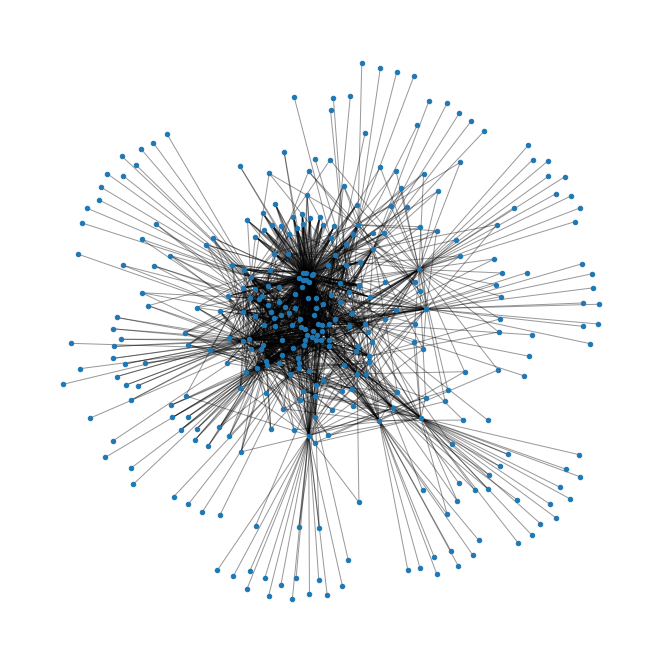

In [37]:
# Degree rank graph
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
dmax = max(degree_sequence)
plt.figure(figsize=(20, 20))
plt.loglog(degree_sequence, "b-", marker="o")
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

# draw graph in inset
plt.figure(figsize=(20, 20))
plt.axes([0.45, 0.45, 0.45, 0.45])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc)
plt.axis("off")
nx.draw_networkx_nodes(Gcc, pos, node_size=20)
nx.draw_networkx_edges(Gcc, pos, alpha=0.4)
plt.show()

In [38]:
# Dendograma
from community import generate_dendrogram
from community import partition_at_level

dendo = generate_dendrogram(g)
for level in range(len(dendo) - 1) :
    print("partition at level", level, "is", partition_at_level(dendo, level))

partition at level 0 is {'cesta_15': 2, 'abacate': 2, 'cesta_16': 2, 'cesta_02': 3, 'abacaxi': 7, 'cesta_07': 12, 'cesta_08': 7, 'cesta_09': 7, 'cesta_10': 7, 'cesta_12': 9, 'cesta_13': 18, 'cesta_14': 11, 'cesta_17': 12, 'cesta_25': 13, 'cesta_20': 14, 'abóbora': 14, 'cesta_05': 16, 'abobrinha': 20, 'cesta_36': 20, 'cesta_37': 20, 'cesta_38': 20, 'cesta_39': 20, 'cesta_40': 20, 'cesta_41': 20, 'acelga': 20, 'cesta_34': 20, 'cesta_35': 20, 'acendedor': 20, 'acho argentino': 20, 'açucar': 20, 'cesta_06': 21, 'adoçante': 20, 'cesta_04': 1, 'agrião': 20, 'cesta_31': 0, 'cesta_32': 12, 'cesta_01': 8, 'água': 12, 'cesta_03': 4, 'cesta_11': 5, 'cesta_18': 6, 'cesta_19': 12, 'cesta_21': 12, 'cesta_22': 12, 'cesta_23': 12, 'cesta_26': 15, 'cesta_27': 15, 'cesta_28': 15, 'cesta_29': 17, 'cesta_30': 19, 'cesta_33': 10, 'aipim': 12, 'ajudante': 20, 'alcatra': 12, 'cesta_24': 12, 'alecrim': 16, 'alface': 20, 'alho': 2, 'amendoim': 12, 'ancho': 2, 'aperitivo': 14, 'aperol': 19, 'arroz': 12, 'atende

In [39]:
dendo_dict = partition_at_level(dendo, level)
df_dendo = pd.DataFrame(list(dendo_dict.items()), columns = ['dendo', 'level'])
df_dendo.head()

dendo  level
0  cesta_15      6
1   abacate      6
2  cesta_16      6
3  cesta_02      6
4   abacaxi      2